In [0]:
## Ecrit par Redouane Lguensat
## pour le cours Deep Learning du Data Engineering Master de l'EHTP
## Avril 2020

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

In [2]:
!wget https://leseco.ma/wp-content/uploads/2018/03/ehtp.jpg

--2020-04-19 15:10:13--  https://leseco.ma/wp-content/uploads/2018/03/ehtp.jpg
Resolving leseco.ma (leseco.ma)... 41.77.115.122
Connecting to leseco.ma (leseco.ma)|41.77.115.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72121 (70K) [image/jpeg]
Saving to: ‘ehtp.jpg’

ehtp.jpg            100%[===================>]  70.43K   191KB/s    in 0.4s    

2020-04-19 15:10:15 (191 KB/s) - ‘ehtp.jpg’ saved [72121/72121]



In [3]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
im = load_img('ehtp.jpg' )
imRGB = img_to_array(im)

In [5]:
img_to_array(im).shape

(430, 925, 3)

In [0]:
imR, imG, imB = imRGB.copy(), imRGB.copy(), imRGB.copy()
imR[:,:,[1,2]]=0.
imG[:,:,[0,2]]=0.
imB[:,:,[0,1]]=0.

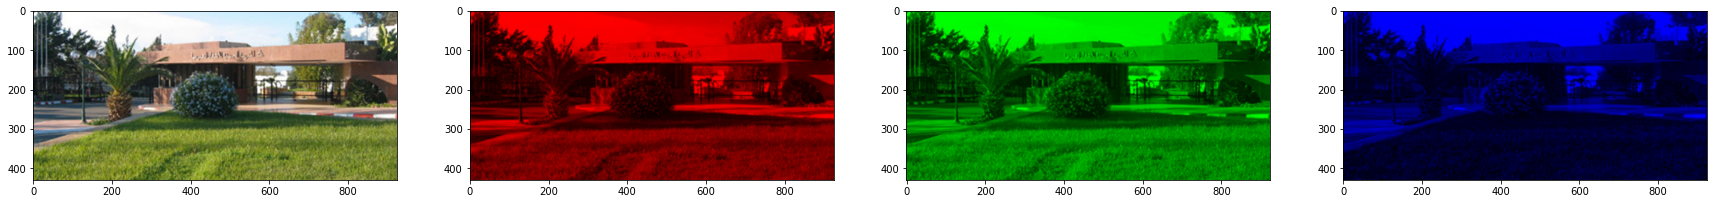

In [8]:
plt.figure(figsize=(30,20))
plt.subplot(1,4,1)
plt.imshow(im)
plt.subplot(1,4,2)
plt.imshow(array_to_img(imR))
plt.subplot(1,4,3)
plt.imshow(array_to_img(imG))
plt.subplot(1,4,4)
plt.imshow(array_to_img(imB))

## Exercice 2

un réseau appris sur MNIST permuté peut aussi prédire avec un bon score les images permuté de MNIST et ça montre que le MLP ne donne pas d'importance à la structure locale

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

In [7]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
rng = np.random.RandomState(42)

In [0]:
perm = rng.permutation(784)

In [0]:
x_train_perm = x_train.reshape(60000, 784)[:,perm].reshape(60000, 28, 28)
x_test_perm = x_test.reshape(10000, 784)[:,perm].reshape(10000, 28, 28)

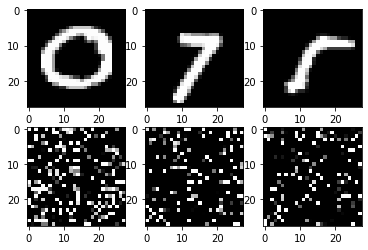

In [11]:
randindices=np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(2,3,1)
plt.imshow(x_train[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(x_train[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(x_train[randindices[2],:,:], cmap='gray')
#######
plt.subplot(2,3,4)
plt.imshow(x_train_perm[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,5)
plt.imshow(x_train_perm[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,6)
plt.imshow(x_train_perm[randindices[2],:,:], cmap='gray')

In [12]:
x_train_perm = x_train_perm.reshape(60000, 784)
x_test_perm = x_test_perm.reshape(10000, 784)
x_train_perm = x_train_perm.astype('float32')
x_test_perm = x_test_perm.astype('float32')
x_train_perm /= 255
x_test_perm /= 255
print(x_train_perm.shape[0], 'train samples')
print(x_test_perm.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

In [0]:
batch_size = 128
epochs = 20

In [17]:
history = model.fit(x_train_perm, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_perm, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2486 - accuracy: 0.9258 - val_loss: 0.1019 - val_accuracy: 0.9682
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0998 - accuracy: 0.9690 - val_loss: 0.0855 - val_accuracy: 0.9736
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0709 - accuracy: 0.9776 - val_loss: 0.0656 - val_accuracy: 0.9814
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0678 - val_accuracy: 0.9801
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0442 - accuracy: 0.9852 - val_loss: 0.0656 - val_accuracy: 0.9807
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.0648 - val_accuracy: 0.9806
Epoch 7/20
60000/60000 [==============================] - 3s 44us/st

In [21]:
score = model.evaluate(x_test_perm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08691230658984674
Test accuracy: 0.9832000136375427


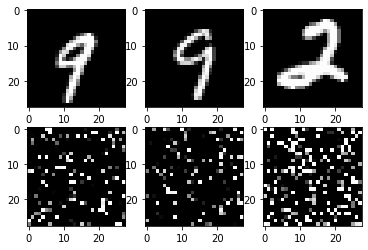

In [22]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(2,3,1)
plt.imshow(x_test[randindices[0],:,:], cmap='gray')
plt.subplot(2,3,2)
plt.imshow(x_test[randindices[1],:,:], cmap='gray')
plt.subplot(2,3,3)
plt.imshow(x_test[randindices[2],:,:], cmap='gray')
#######
plt.subplot(2,3,4)
plt.imshow(np.reshape(x_test_perm[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(2,3,5)
plt.imshow(np.reshape(x_test_perm[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(2,3,6)
plt.imshow(np.reshape(x_test_perm[randindices[2],:],(28,28)), cmap='gray')

In [23]:
predictions=model.predict(x_test_perm)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 9 avec une confiance 100.0%.
Le réseau reconnaît le chiffre 9 avec une confiance 99.99991655349731%.
Le réseau reconnaît le chiffre 2 avec une confiance 100.0%.


# Exercice 3 : LeNet5 pour MNIST

a little bit modified version of LeNet5

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [0]:
# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [23]:
model = keras.Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='valid', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/step - loss: 1.1042 - accuracy: 0.8615 - val_loss: 0.1984 - val_accuracy: 0.9418
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1460 - accuracy: 0.9576 - val_loss: 0.1231 - val_accuracy: 0.9620
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0925 - accuracy: 0.9725 - val_loss: 0.0904 - val_accuracy: 0.9726
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.0860 - val_accuracy: 0.9742
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.0832 - val_accuracy: 0.9761
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0740 - val_accuracy: 0.9784
Epoch 7/20
60000/60000 [==============================] - 2s 34us/s

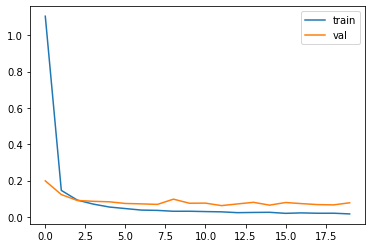

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07776046367833457
Test accuracy: 0.9830999970436096


# Exercice 4: LSTM pour prédicition de nombre de voyageurs d'une compagnie aérienne

Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 

In [0]:
from keras.layers import LSTM
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-04-19 16:34:48--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-04-19 16:34:48 (28.3 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [29]:
dataset = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


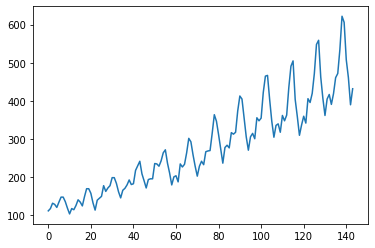

In [8]:
plt.plot(dataset)

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0521
Epoch 2/100
 - 1s - loss: 0.0259
Epoch 3/100
 - 1s - loss: 0.0190
Epoch 4/100
 - 1s - loss: 0.0171
Epoch 5/100
 - 1s - loss: 0.0159
Epoch 6/100
 - 1s - loss: 0.0149
Epoch 7/100
 - 1s - loss: 0.0139
Epoch 8/100
 - 1s - loss: 0.0129
Epoch 9/100
 - 1s - loss: 0.0119
Epoch 10/100
 - 1s - loss: 0.0109
Epoch 11/100
 - 1s - loss: 0.0099
Epoch 12/100
 - 1s - loss: 0.0091
Epoch 13/100
 - 1s - loss: 0.0082
Epoch 14/100
 - 1s - loss: 0.0073
Epoch 15/100
 - 1s - loss: 0.0064
Epoch 16/100
 - 1s - loss: 0.0056
Epoch 17/100
 - 1s - loss: 0.0049
Epoch 18/100
 - 1s - loss: 0.0043
Epoch 19/100
 - 1s - loss: 0.0038
Epoch 20/100
 - 1s - loss: 0.0033
Epoch 21/100
 - 1s - loss: 0.0030
Epoch 22/100
 - 1s - loss: 0.0027
Epoch 23/100
 - 1s - loss: 0.0025
Epoch 24/100
 - 1s - loss: 0.0023
Epoch 25/100
 - 1s - loss: 0.0022
Epoch 26/100
 - 1s - loss: 0.0022
Epoch 27/100
 - 1s - loss: 0.0020
Epoch 28/100
 - 1s - loss: 0.0020
Epoch 29/100
 - 1s - loss: 0.0021
Epoch 30/100
 - 1s - lo

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

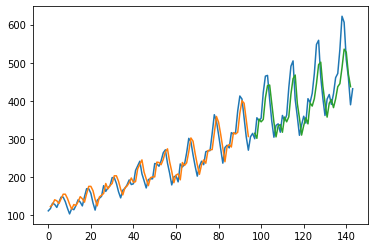

In [27]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()